# Tarea 1: Ética, sesgo y equidad

- **Curso**: Procesamiento de lenguaje natural
- **Autores**: Danny Xie Li, Miguel Abreu
- **Semestre**: II Semestre, 2024
- **Profesora**: María Auxiliadora Cross

In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
    

In [2]:
from datasets import load_dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def plot_gender_distribution(bias_in_bios_dataset_df, setname="train"):
    """
    Plots the gender distribution across professions in the given dataset.
    Parameters:
    bias_in_bios_dataset_df (pd.DataFrame): The DataFrame containing the dataset with profession and gender labels.
    setname (str): A string indicating the name of the dataset (e.g., 'train', 'test'). Default is 'train'.

    This function creates a count plot showing the distribution of gender labels across different professions.
    """
    # Adjust the figure size to provide more spacing
    plt.figure(figsize=(14, 8))
    # Create a count plot with professions on the x-axis and color-coded by gender
    sns.countplot(data=bias_in_bios_dataset_df, x='profession_label', hue='gender_label')
    # Set the title of the plot
    plt.title(f'Gender distribution across professions {setname}')
    # Set the x-axis label
    plt.xlabel('Profession')
    # Set the y-axis label
    plt.ylabel('Count')
    # Rotate the x-axis labels for better readability, adjust the text alignment and font size
    plt.xticks(rotation=45, ha='right', fontsize=12)
    # Add a legend with the title 'Gender'
    plt.legend(title='Gender')
    # Adjust the layout to fit everything within the figure area
    plt.tight_layout()
    # Display the plot
    plt.show()

## Análisis de datos

In [4]:
bias_in_bios_dataset = load_dataset("LabHC/bias_in_bios")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/257478 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/99069 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/39642 [00:00<?, ? examples/s]

In [5]:
profession_dict = {
    "accountant": 0,
    "architect": 1,
    "attorney": 2,
    "chiropractor": 3,
    "comedian": 4,
    "composer": 5,
    "dentist": 6,
    "dietitian": 7,
    "dj": 8,
    "filmmaker": 9,
    "interior_designer": 10,
    "journalist": 11,
    "model": 12,
    "nurse": 13,
    "painter": 14,
    "paralegal": 15,
    "pastor": 16,
    "personal_trainer": 17,
    "photographer": 18,
    "physician": 19,
    "poet": 20,
    "professor": 21,
    "psychologist": 22,
    "rapper": 23,
    "software_engineer": 24,
    "surgeon": 25,
    "teacher": 26,
    "yoga_teacher": 27
}

gender = {
    "male": 0,
    "female": 1,
}

In [6]:
inverse_profession_dict = {v: k for k, v in profession_dict.items()}
inverse_gender_dict = {v: k for k, v in gender.items()}

In [10]:
df_train = pd.DataFrame(bias_in_bios_dataset["train"])
df_train["profession_label"] = df_train["profession"].apply(lambda x: inverse_profession_dict[x])
df_train["gender_label"] = df_train["gender"].apply(lambda x: inverse_gender_dict[x])
df_train.head(5)

,hard_text,profession,gender,profession_label,gender_label
0,He is also the project lead of and major contr...,21,0,professor,male
1,"She is able to assess, diagnose and treat mino...",13,1,nurse,female
2,"Prior to law school, Brittni graduated magna c...",2,1,attorney,female
3,He regularly contributes to India’s First Onli...,11,0,journalist,male
4,He completed his medical degree at Northwester...,21,0,professor,male


In [11]:
df_val = pd.DataFrame(bias_in_bios_dataset["dev"])
df_val["profession_label"] = df_val["profession"].apply(lambda x: inverse_profession_dict[x])
df_val["gender_label"] = df_val["gender"].apply(lambda x: inverse_gender_dict[x])
df_val.head(5)

,hard_text,profession,gender,profession_label,gender_label
0,Tampio researches the history of political tho...,21,0,professor,male
1,He has been a practicing Dentist for 11 years....,6,0,dentist,male
2,Mr. Miserez devotes a substantial portion of h...,2,0,attorney,male
3,She holds a master’s degree in nutrition educa...,7,1,dietitian,female
4,She received her Ph.D. in 2013 from Florida In...,21,1,professor,female


In [12]:
df_test = pd.DataFrame(bias_in_bios_dataset["test"])
df_test["profession_label"] = df_test["profession"].apply(lambda x: inverse_profession_dict[x])
df_test["gender_label"] = df_test["gender"].apply(lambda x: inverse_gender_dict[x])
df_test.head(5)

,hard_text,profession,gender,profession_label,gender_label
0,"He specializes in development economics, house...",21,0,professor,male
1,He started out as a DJ and music producer in t...,5,0,composer,male
2,"She is averse to all things scary or sad, so s...",4,1,comedian,female
3,"Prior to joining USC, she was a mobile news ed...",21,1,professor,female
4,"Previously, she served as an assistant profess...",21,1,professor,female


In [13]:
gender_counts = df_train['gender_label'].value_counts(normalize=True) * 100
gender_counts

,proportion
gender_label,
male,53.899751
female,46.100249


In [14]:
# Concatenate the three DataFrames
combined_df = pd.concat([df_train, df_test, df_val], ignore_index=True)
combined_df_no_professor = combined_df[combined_df["profession_label"] != "professor"]
combined_df_no_professor

,hard_text,profession,gender,profession_label,gender_label
1,"She is able to assess, diagnose and treat mino...",13,1,nurse,female
2,"Prior to law school, Brittni graduated magna c...",2,1,attorney,female
3,He regularly contributes to India’s First Onli...,11,0,journalist,male
5,Steve has practiced law in Kentucky for over 3...,2,0,attorney,male
7,"Trained as a doctor, she lives in Algiers wher...",20,1,poet,female
...,...,...,...,...,...
396184,Dr. Danish Khan practices at Dent O Care Denta...,6,0,dentist,male
396185,He is one of the oldest readers of the Eye of ...,18,0,photographer,male
396186,"Born in Barranquilla, Colombia, Stephanie has ...",11,1,journalist,female
396187,Trained as a documentary storyteller as a film...,9,0,filmmaker,male


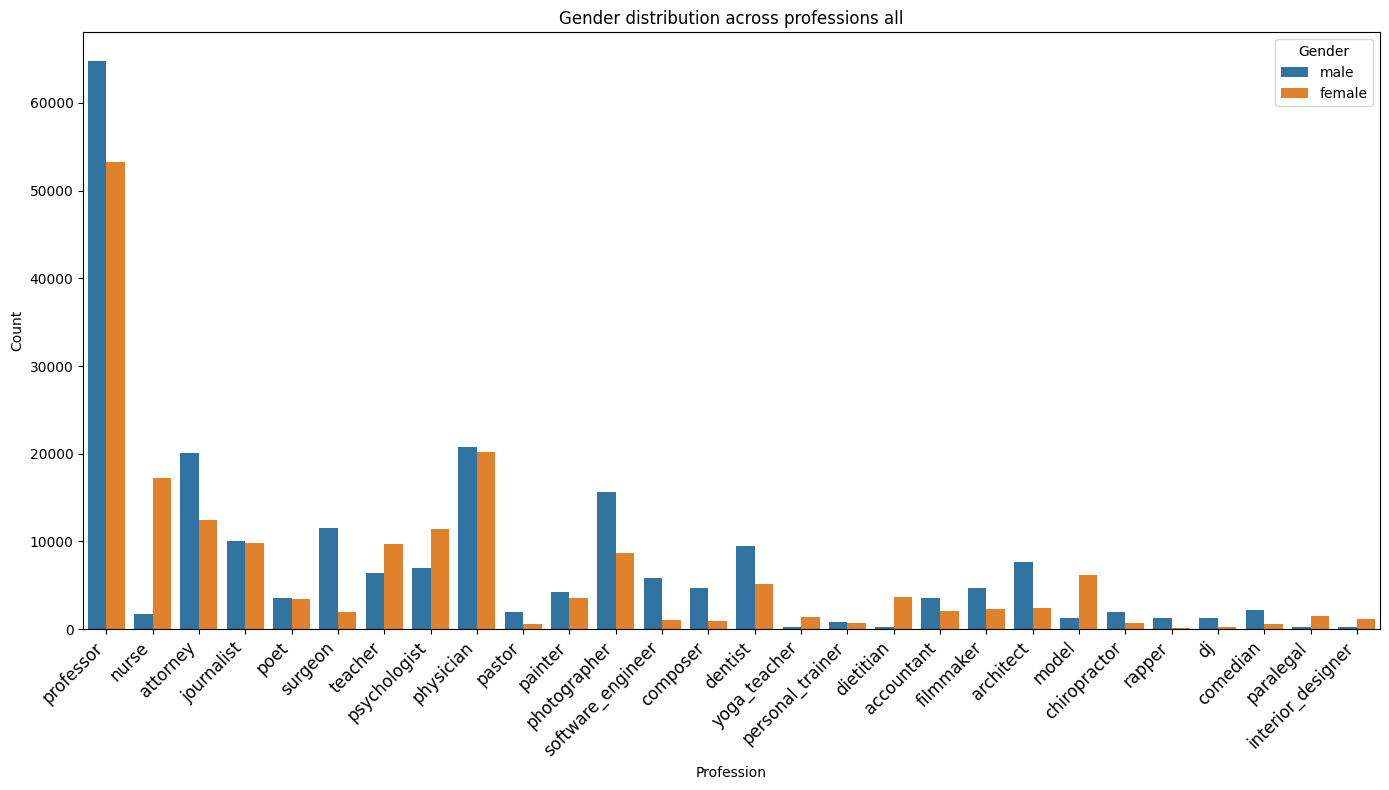

In [15]:
plot_gender_distribution(combined_df, setname="all")

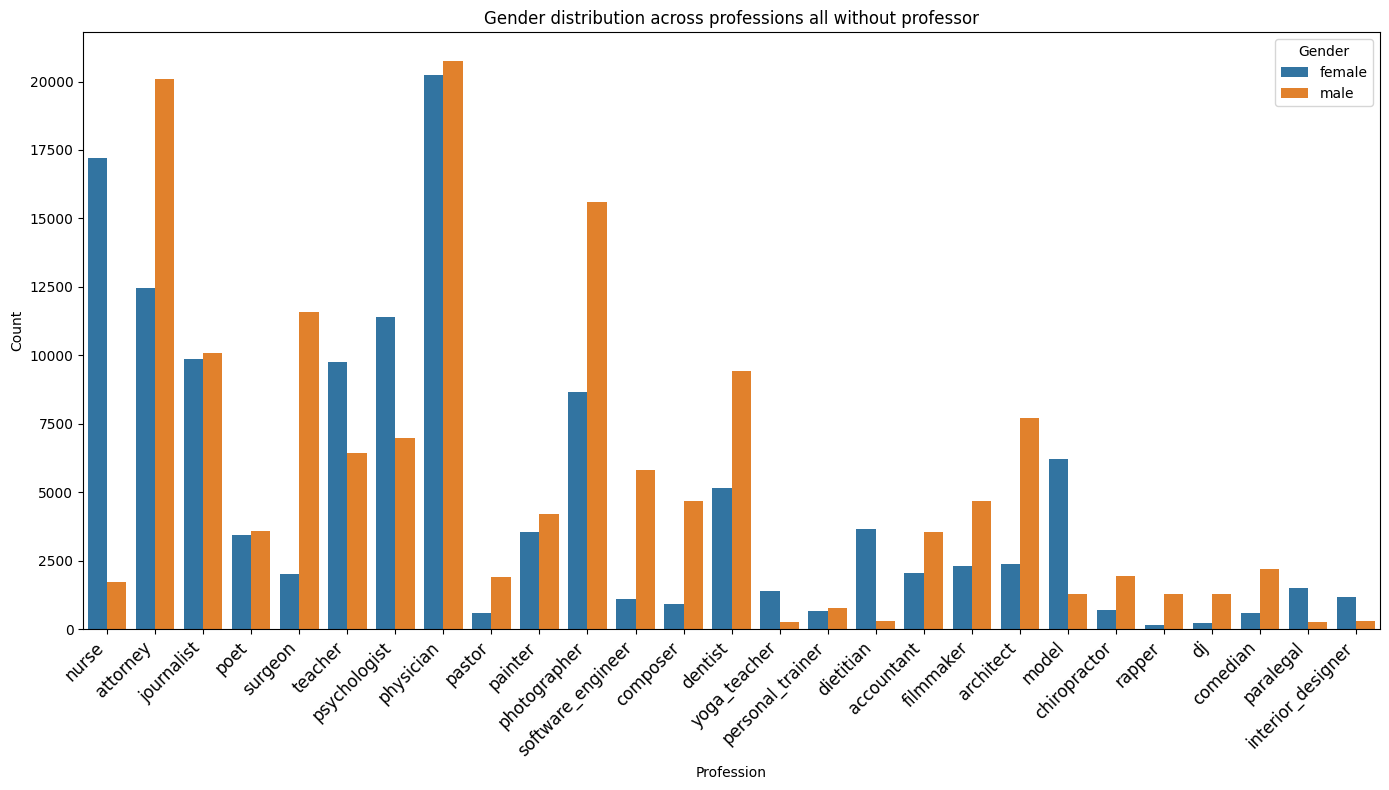

In [16]:
plot_gender_distribution(combined_df_no_professor, setname="all without professor")

In [17]:
grouped_df = combined_df.groupby(['profession_label', 'gender_label']).size().reset_index(name='count')
grouped_df

,profession_label,gender_label,count
0,accountant,female,2067
1,accountant,male,3566
2,architect,female,2393
3,architect,male,7715
4,attorney,female,12471
5,attorney,male,20099
6,chiropractor,female,699
7,chiropractor,male,1956
8,comedian,female,594
9,comedian,male,2215


In [18]:
# Pivot the DataFrame to have 'profession_label' as index, 'gender_label' as columns, and 'count' as values
pivot_df = grouped_df.pivot(index='profession_label', columns='gender_label', values='count')
# Calculate the difference between male and female counts for each profession
pivot_df['difference'] = pivot_df['male'] - pivot_df['female']
# Count how many professions have a positive difference (male count surpasses female count)
num_professions_male_surpass = (pivot_df['difference'] > 0).sum()

# Print the result
print("Number of professions where male count surpasses female count:", num_professions_male_surpass)
print("Total professions: ", len(grouped_df.profession_label.unique()))
print("% of professions with male: ", num_professions_male_surpass/len(grouped_df.profession_label.unique()))

Number of professions where male count surpasses female count: 20
Total professions:  28
% of professions with male:  0.7142857142857143


In [19]:
# Group by 'profession_label' and 'gender_label' and count occurrences
grouped_df = combined_df.groupby(['profession_label', 'gender_label']).size().reset_index(name='count')
# Pivot the DataFrame to have 'profession_label' as index, 'gender_label' as columns, and 'count' as values
pivot_df = grouped_df.pivot(index='profession_label', columns='gender_label', values='count')
# Calculate the proportion of female and male for each profession
pivot_df['female_proportion'] = pivot_df['female'] / (pivot_df['female'] + pivot_df['male'])
pivot_df['male_proportion'] = pivot_df['male'] / (pivot_df['female'] + pivot_df['male'])

# Display the DataFrame with proportions
pivot_df

gender_label,female,male,female_proportion,male_proportion
profession_label,,,,
accountant,2067,3566,0.366945,0.633055
architect,2393,7715,0.236743,0.763257
attorney,12471,20099,0.382898,0.617102
chiropractor,699,1956,0.263277,0.736723
comedian,594,2215,0.211463,0.788537
composer,917,4682,0.163779,0.836221
dentist,5148,9437,0.352965,0.647035
dietitian,3669,283,0.928391,0.071609
dj,211,1275,0.141992,0.858008


In [20]:
# Sort the pivot_df by 'male' count in descending order and select the top 10
top_10_male_professions = pivot_df.sort_values('male', ascending=False).head(8)
# Calculate the mean of female proportions for these top 10 male professions
mean_female_proportion = top_10_male_professions['female_proportion'].mean()
print("Mean of female proportion in top 10 male count professions:", mean_female_proportion)
top_10_male_professions

Mean of female proportion in top 10 male count professions: 0.3647084678466497


gender_label,female,male,female_proportion,male_proportion
profession_label,,,,
professor,53259,64817,0.451057,0.548943
physician,20240,20758,0.493683,0.506317
attorney,12471,20099,0.382898,0.617102
photographer,8666,15603,0.357081,0.642919
surgeon,2014,11573,0.148230,0.851770
journalist,9871,10070,0.495010,0.504990
dentist,5148,9437,0.352965,0.647035
architect,2393,7715,0.236743,0.763257


In [21]:
profession_counts = combined_df['profession_label'].value_counts()

# Calculate percentages
profession_percentages = profession_counts / profession_counts.sum() * 100

# Create a DataFrame for display
profession_df = pd.DataFrame({
    'Profession': profession_percentages.index,
    'Percentage': profession_percentages.values
})

# Sort by percentage in descending order
profession_df_sorted = profession_df.sort_values('Percentage', ascending=False)

# Display the result
profession_df_sorted

,Profession,Percentage
0,professor,29.802948
1,physician,10.348091
2,attorney,8.220824
3,photographer,6.125612
4,journalist,5.033204
5,nurse,4.783071
6,psychologist,4.639200
7,teacher,4.089715
8,dentist,3.681324
9,surgeon,3.429424


In [22]:
# Calculate the standard deviation of the 'Percentage' column
std_dev = profession_df_sorted['Percentage'].std()

# Calculate the mean of the 'Percentage' column
mean_value = profession_df_sorted['Percentage'].mean()

print("Standard Deviation:", std_dev)
print("Mean:", mean_value)

Standard Deviation: 5.726807891819819
Mean: 3.571428571428572


## Análisis de texto
- **Objetivo**: Identificar las palabras más frecuentes y palabras comunes en cada género.

In [23]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# Download NLTK data files (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

def get_top_frequent_words_from_list(texts, num_words=10):
    """Get the top frequent words from the list of texts"""
    all_words = []

    # Process each text in the list with a progress bar
    for text in tqdm(texts, desc="Processing texts"):
        # Tokenize the text
        words = word_tokenize(text.lower())
        # Remove punctuation and stopwords
        words = [word for word in words if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        pronouns = {'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',}
        stop_words = stop_words - pronouns
        words = [word for word in words if word not in stop_words]
        # Add words to the overall list
        all_words.extend(words)
    # Count the frequency of each word
    word_freq = Counter(all_words)
    # Get the most common words
    common_words = word_freq.most_common(num_words)
    return common_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def preprocess_text(text):
    """Remove the stopwords, tokenize and lower case the text"""
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and punctuation
    return ' '.join(filtered_tokens)

def generate_word_cloud(texts):
    """Generate the word cloud using tf-idf algorithm"""
    all_words = []

    preprocessed_documents = [preprocess_text(text) for text in texts]
    # Compute TF-IDF scores
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(preprocessed_documents)
    feature_names = vectorizer.get_feature_names_out()
    # Aggregate TF-IDF scores across all documents
    tfidf_scores = np.asarray(X.sum(axis=0)).flatten()
    word_scores = dict(zip(feature_names, tfidf_scores))
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [25]:
female_hard_text = combined_df[(combined_df["gender_label"] == "female") & (combined_df["profession_label"] != "professor")]["hard_text"]
male_hard_text = combined_df[(combined_df["gender_label"] == "male") & (combined_df["profession_label"] != "professor")]["hard_text"]

In [29]:
top_words_female = get_top_frequent_words_from_list(female_hard_text, num_words=100)
top_words_female

Processing texts: 100%|██████████| 129387/129387 [02:52<00:00, 750.87it/s] 


[('she', 213070),
 ('her', 134942),
 ('university', 43820),
 ('medical', 37692),
 ('hospital', 30954),
 ('years', 30468),
 ('medicine', 25089),
 ('center', 22645),
 ('also', 22621),
 ('school', 21864),
 ('health', 21369),
 ('new', 18005),
 ('work', 16676),
 ('practices', 16511),
 ('including', 16419),
 ('law', 16080),
 ('graduated', 15881),
 ('book', 14754),
 ('currently', 14574),
 ('affiliated', 14553),
 ('number', 14500),
 ('practice', 13866),
 ('college', 13748),
 ('degree', 12948),
 ('specializes', 12792),
 ('nurse', 12353),
 ('information', 11935),
 ('phone', 11774),
 ('honors', 11602),
 ('worked', 11552),
 ('family', 11458),
 ('experience', 11208),
 ('appointment', 11205),
 ('many', 10993),
 ('care', 10895),
 ('english', 10883),
 ('experiences', 10865),
 ('especially', 10689),
 ('group', 10635),
 ('diverse', 10572),
 ('doctors', 10493),
 ('call', 10283),
 ('children', 10061),
 ('working', 9916),
 ('specialists', 9864),
 ('advises', 9806),
 ('received', 9730),
 ('cooperates', 9676

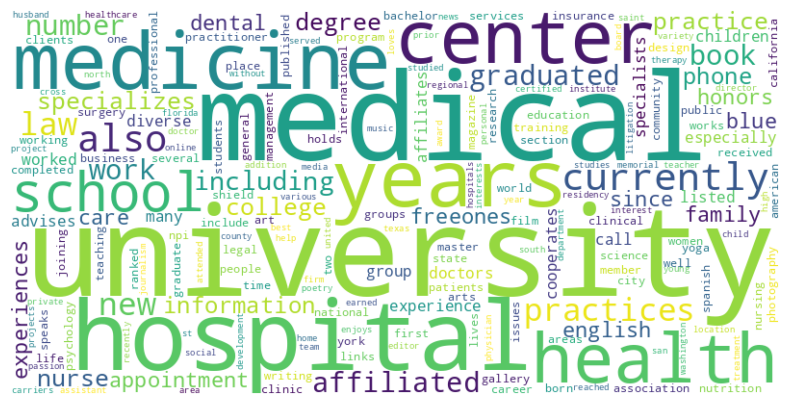

In [27]:
generate_word_cloud(female_hard_text)

In [30]:
top_words_male = get_top_frequent_words_from_list(male_hard_text, num_words=100)
top_words_male

Processing texts: 100%|██████████| 148726/148726 [02:44<00:00, 903.95it/s] 


[('he', 253737),
 ('his', 150928),
 ('university', 55384),
 ('medical', 37746),
 ('years', 29969),
 ('school', 29905),
 ('also', 29637),
 ('hospital', 28495),
 ('blue', 27286),
 ('medicine', 24426),
 ('new', 24267),
 ('center', 21634),
 ('law', 20687),
 ('including', 19856),
 ('work', 19482),
 ('practice', 18362),
 ('college', 18331),
 ('affiliated', 16803),
 ('health', 16195),
 ('shield', 16119),
 ('insurance', 15382),
 ('dental', 14747),
 ('surgery', 14707),
 ('practices', 14311),
 ('include', 14209),
 ('currently', 14113),
 ('experience', 13123),
 ('him', 12775),
 ('residency', 12723),
 ('completed', 12561),
 ('well', 12442),
 ('degree', 12232),
 ('received', 12168),
 ('worked', 11946),
 ('member', 11620),
 ('patients', 11512),
 ('graduated', 11215),
 ('photography', 10915),
 ('state', 10880),
 ('music', 10871),
 ('many', 10134),
 ('one', 9912),
 ('cross', 9895),
 ('york', 9727),
 ('since', 9687),
 ('several', 9628),
 ('professional', 9427),
 ('working', 9262),
 ('carriers', 9159),


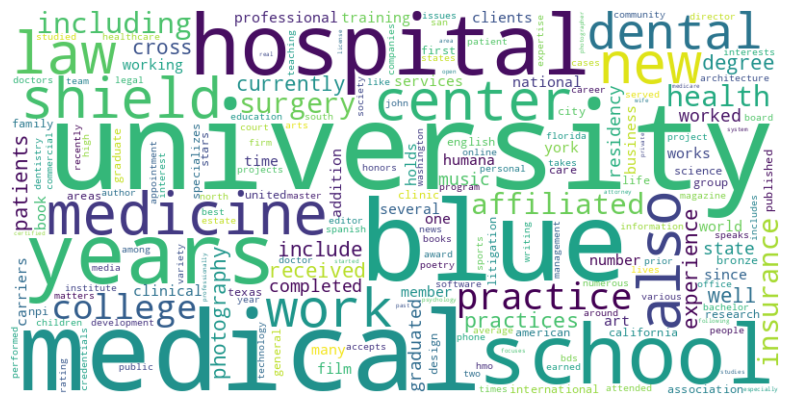

In [31]:
generate_word_cloud(male_hard_text)

## Experimentos en modelos contextuales
- **Objetivo**: Identificar sesgos de género en modelos preentrenados

In [32]:
import pandas as pd
from tqdm import tqdm
from transformers import pipeline
from sklearn.metrics import precision_recall_fscore_support

In [33]:
def filter_professions(df, professions):
    """Filter the DataFrame to only include specified professions."""
    return df[df['profession_label'].isin(professions)]

def get_gender_counts(df):
    """Count the occurrences of each gender in the DataFrame."""
    return df['gender'].value_counts()

def split_by_profession(df, profession):
    """Split the DataFrame by a specific profession."""
    return df[df['profession_label'] == profession]

def downsample_majority_gender(df, sample_size):
    """Downsample the majority gender to match the sample size of the minority gender."""
    return df.groupby('gender').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)

def combine_dataframes(dfs):
    """Combine multiple DataFrames into one."""
    return pd.concat(dfs, ignore_index=True)

def run_model_pipeline(texts, model_name, candidate_labels):
    """Run the model pipeline on the given texts and return the results."""
    pipe = pipeline(model=model_name)
    results = []
    for text in tqdm(texts, desc=f"Processing with {model_name}", unit="text"):
        result = pipe(text, candidate_labels=candidate_labels)
        results.append(result)
    return results

def get_top_labels(df):
    """Determine the top label for each row based on scores."""
    df['top_label'] = df.apply(lambda row: row['labels'][row['scores'].index(max(row['scores']))], axis=1)
    return df

def calculate_f1_scores(df):
    """Calculate precision, recall, and F1 score for each profession and gender combination."""
    professions = df['profession_label'].unique()
    genders = df['gender'].unique()
    results = []

    for profession in professions:
        for gender in genders:
            subset = df[(df['profession_label'] == profession) & (df['gender'] == gender)]

            if subset.empty:
                continue

            y_true = subset['profession_label']
            y_pred = subset['predicted']

            precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', pos_label=profession)

            results.append({
                'profession': profession,
                'gender': gender,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })

    return pd.DataFrame(results)

In [34]:
# Load and filter the DataFrame
bias_in_bios_df_test = filter_professions(df_test, ['nurse', 'software_engineer'])

# Get gender counts and determine minority gender
gender_counts = get_gender_counts(bias_in_bios_df_test)
minority_gender = gender_counts.idxmin()
minority_count = gender_counts[minority_gender]

# Split and downsample the DataFrame
bias_in_bios_df_test_nurse = split_by_profession(bias_in_bios_df_test, 'nurse')
bias_in_bios_df_test_software_engineer = split_by_profession(bias_in_bios_df_test, 'software_engineer')

bias_in_bios_df_test_nurse = downsample_majority_gender(bias_in_bios_df_test_nurse, 200)
bias_in_bios_df_test_software_engineer = downsample_majority_gender(bias_in_bios_df_test_software_engineer, 200)

# Combine the downsampled DataFrames
combined_df = combine_dataframes([bias_in_bios_df_test_nurse, bias_in_bios_df_test_software_engineer])
hard_text = combined_df["hard_text"]

In [35]:
# Run the model pipeline
models = ["cross-encoder/nli-roberta-base"]
candidate_labels = ["nurse", "software_engineer"]
dict_results = {}

for model_name in models:
    dict_results[model_name] = run_model_pipeline(hard_text, model_name, candidate_labels)

# Convert results to DataFrame and determine top labels
data = dict_results["cross-encoder/nli-roberta-base"]
df = pd.DataFrame(data)
df = get_top_labels(df)

# Add predictions to the combined DataFrame
combined_df["predicted"] = df["top_label"]

# Calculate F1 scores
results_df = calculate_f1_scores(combined_df)
results_df

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Processing with cross-encoder/nli-roberta-base: 100%|██████████| 800/800 [10:10<00:00,  1.31text/s]


,profession,gender,precision,recall,f1_score
0,nurse,0,1.0,0.845,0.915989
1,nurse,1,1.0,0.990,0.994975
2,software_engineer,0,1.0,0.805,0.891967
3,software_engineer,1,1.0,0.850,0.918919


In [36]:
# Run the model pipeline
models = ["facebook/bart-large-mnli"]
candidate_labels = ["nurse", "software_engineer"]
dict_results = {}

for model_name in models:
    dict_results[model_name] = run_model_pipeline(hard_text, model_name, candidate_labels)

# Convert results to DataFrame and determine top labels
data = dict_results["facebook/bart-large-mnli"]
df = pd.DataFrame(data)
df = get_top_labels(df)

# Add predictions to the combined DataFrame
combined_df["predicted"] = df["top_label"]

# Calculate F1 scores
results_df = calculate_f1_scores(combined_df)
results_df

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Processing with facebook/bart-large-mnli: 100%|██████████| 800/800 [41:42<00:00,  3.13s/text]


,profession,gender,precision,recall,f1_score
0,nurse,0,1.0,0.790,0.882682
1,nurse,1,1.0,0.920,0.958333
2,software_engineer,0,1.0,0.995,0.997494
3,software_engineer,1,1.0,0.985,0.992443


### Preprocesamiento para mitigar sesgo
**Máscara de género**: Para enmascarar el género en el texto, utilizamos una etiqueta que identifica artículos y pronombres que pueden revelar el género. En este enfoque inicial, se propuso el siguiente mapeo: gender_mask

        * "he" se etiqueta como [PRONOUN]
        * "she" también se etiqueta como [PRONOUN]
        * "his" se clasifica como [POSSESSIVE]
        * "her" se marca como [POSSESSIVE]
        * "him" se etiqueta como [OBJECT]
    Por ejemplo, considera la siguiente oración: "She joined IBM in 2007 and has been part of the Java Technology Center. She has worked on JAXB and JAXWS on JDK6, and currently she is part of JDK7 development." Esta oración se transforma en: [PRONOUN] joined IBM in 2007 and has been part of the Java Technology Center. [PRONOUN] has worked on JAXB and JAXWS on JDK6, and currently [PRONOUN] is part of JDK7 development.

In [37]:
import spacy
import re

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Dictionary for gender-specific terms to mask tokens
gender_mask_spacy = {
    "he": "[PRONOUN]",
    "she": "[PRONOUN]",
    "his": "[POSSESSIVE]",
    "her": "[POSSESSIVE]",
    "him": "[OBJECT]"
}

def mask_gender_spacy(doc):
    """Mask the gender in the text using the predefined gender_mask_spacy dictionary"""
    result = []
    for token in doc:
        # Replace gender-specific terms
        masked_word = gender_mask_spacy.get(token.text.lower(), token.text)
        result.append(masked_word)
    return re.sub(r'\s+([.,])', r'\1', " ".join(result))

def mask_gender_texts(texts):
    """Mask the gender in all the texts using the predefined gender_mask_spacy dictionary"""
    masked_text = []
    for text in texts:
        doc = nlp(text)
        masked_text.append(mask_gender_spacy(doc))
    return masked_text

In [38]:
# Run the model pipeline
models = ["cross-encoder/nli-roberta-base"]
candidate_labels = ["nurse", "software_engineer"]
dict_results = {}

for model_name in models:
    dict_results[model_name] = run_model_pipeline(hard_text, model_name, candidate_labels)

# Convert results to DataFrame and determine top labels
data = dict_results["cross-encoder/nli-roberta-base"]
df = pd.DataFrame(data)
df = get_top_labels(df)

# Add predictions to the combined DataFrame
combined_df["predicted"] = df["top_label"]

# Calculate F1 scores
results_df = calculate_f1_scores(combined_df)
results_df

Processing with cross-encoder/nli-roberta-base: 100%|██████████| 800/800 [09:26<00:00,  1.41text/s]


,profession,gender,precision,recall,f1_score
0,nurse,0,1.0,0.845,0.915989
1,nurse,1,1.0,0.990,0.994975
2,software_engineer,0,1.0,0.805,0.891967
3,software_engineer,1,1.0,0.850,0.918919


In [39]:
# Run the model pipeline
models = ["facebook/bart-large-mnli"]
candidate_labels = ["nurse", "software_engineer"]
dict_results = {}
hard_text = mask_gender_texts(combined_df["hard_text"])

for model_name in models:
    dict_results[model_name] = run_model_pipeline(hard_text, model_name, candidate_labels)

# Convert results to DataFrame and determine top labels
data = dict_results["facebook/bart-large-mnli"]
df = pd.DataFrame(data)
df = get_top_labels(df)

# Add predictions to the combined DataFrame
combined_df["predicted"] = df["top_label"]

# Calculate F1 scores
results_df = calculate_f1_scores(combined_df)
results_df

Processing with facebook/bart-large-mnli: 100%|██████████| 800/800 [45:55<00:00,  3.44s/text]


,profession,gender,precision,recall,f1_score
0,nurse,0,1.0,0.825,0.904110
1,nurse,1,1.0,0.890,0.941799
2,software_engineer,0,1.0,0.980,0.989899
3,software_engineer,1,1.0,0.945,0.971722
